In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering,DBSCAN
import scipy.cluster.hierarchy as sch

In [2]:
df=pd.read_excel('/content/EastWestAirlines.xlsx',sheet_name='data')
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [3]:
print(df.shape)
print(df.columns)
print(df.info())
print(df.describe())
print(df.dtypes)

(3999, 12)
Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memo

In [4]:
df.isnull().sum()

,0
ID#,0
Balance,0
Qual_miles,0
cc1_miles,0
cc2_miles,0
cc3_miles,0
Bonus_miles,0
Bonus_trans,0
Flight_miles_12mo,0
Flight_trans_12,0


In [5]:
df.duplicated().sum()

np.int64(0)

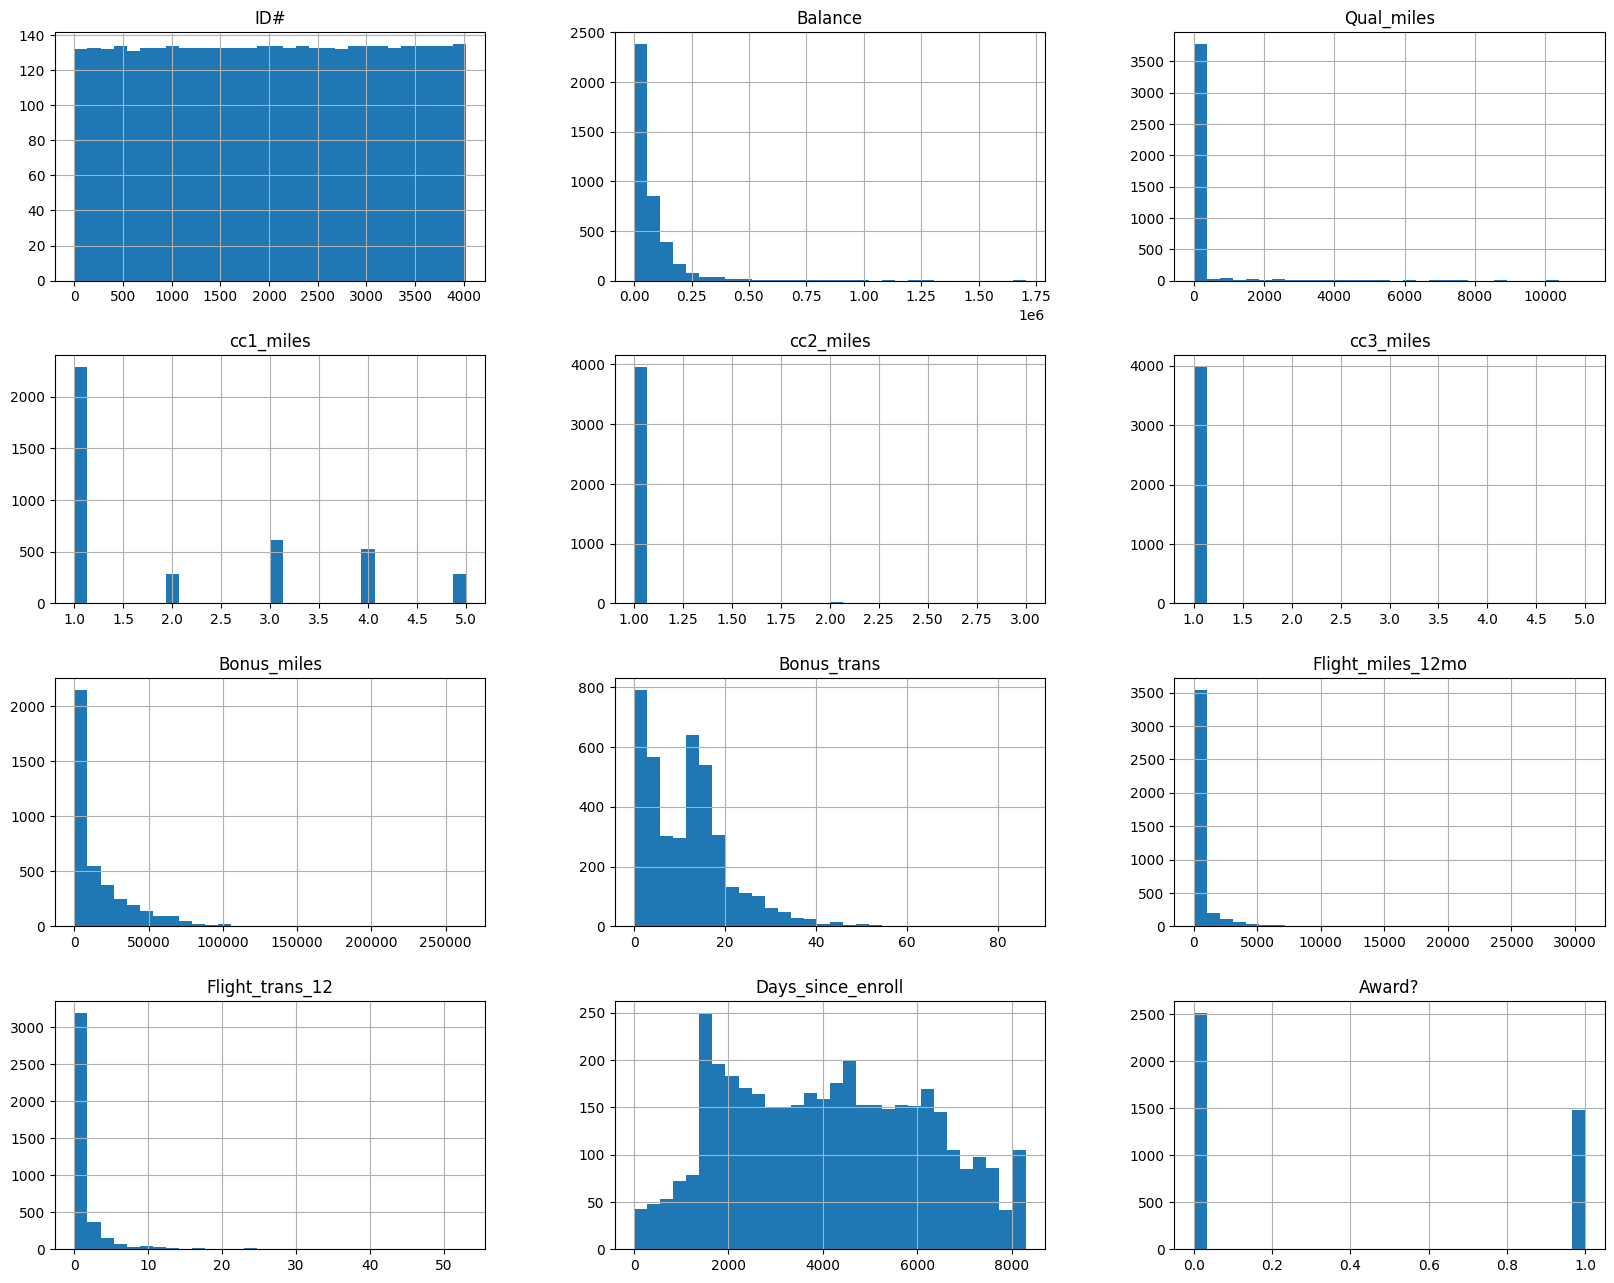

In [6]:
df.hist(bins=30,figsize=(20,20),layout=(5,3))
plt.show()

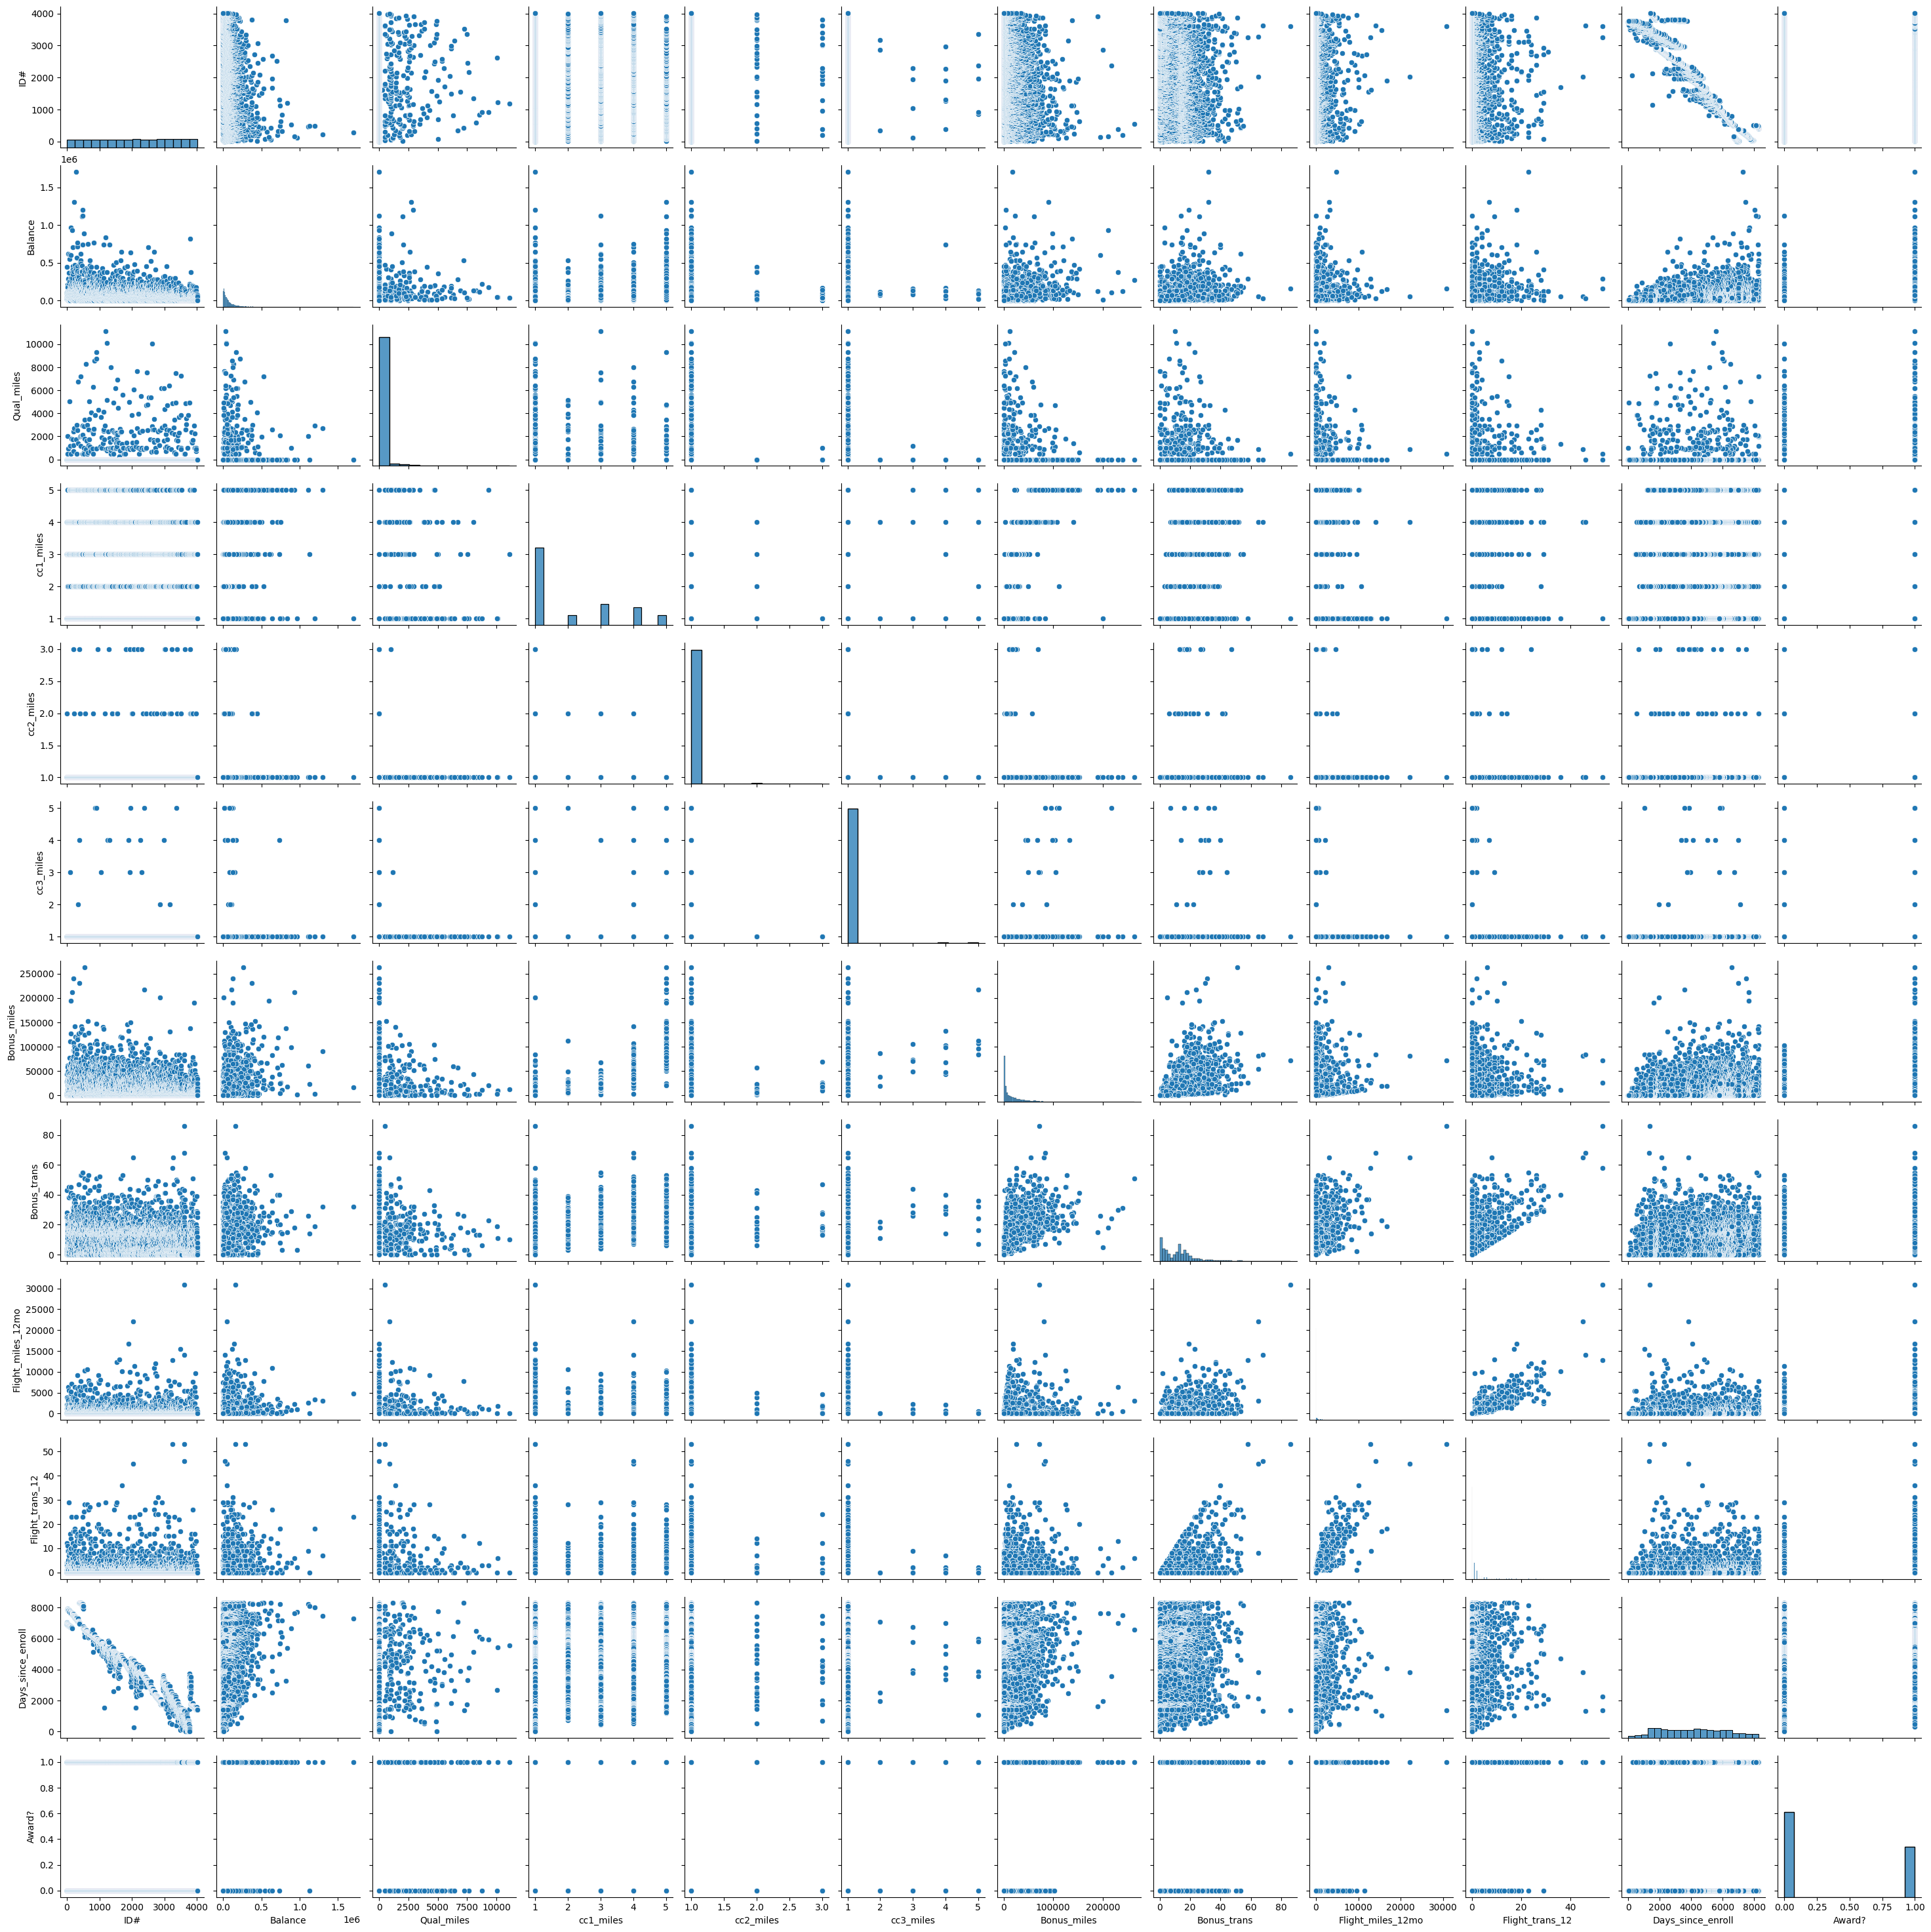

In [7]:
sns.pairplot(df)
plt.show()

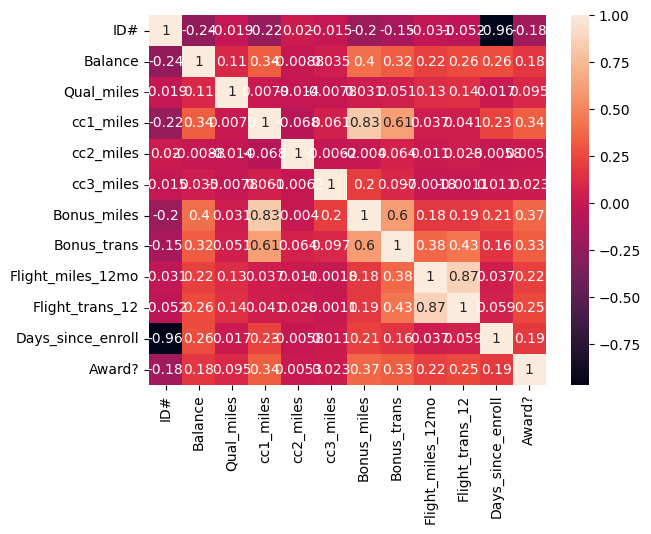

In [8]:
corr=df.corr()
sns.heatmap(corr,annot=True)
plt.show()

In [9]:
df.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [10]:
features=df.drop(columns=['ID#','Award?'])

In [11]:
kmeans=KMeans(n_clusters=3)

In [12]:
cluster=kmeans.fit(features)

In [13]:
np.unique(cluster.labels_)

array([0, 1, 2], dtype=int32)

In [14]:
features['cluster']=cluster.labels_

In [15]:
features[features.cluster==2]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,cluster
4,97752,0,4,1,1,43300,26,2077,4,6935,2
9,104860,0,3,1,1,28426,28,1150,3,6931,2
11,96522,0,5,1,1,61105,19,0,0,6924,2
20,120576,0,5,1,1,58831,23,250,2,6896,2
21,185681,2024,1,1,1,13300,16,1800,9,6896,2
...,...,...,...,...,...,...,...,...,...,...,...
3915,121156,0,1,1,1,12245,6,1000,2,1538,2
3917,130748,0,4,1,1,65510,37,6349,7,1545,2
3946,139032,0,3,1,1,19565,17,1150,4,1481,2
3949,170632,0,1,1,1,4650,3,0,0,1480,2


In [16]:
features.columns

Index(['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'cluster'],
      dtype='object')

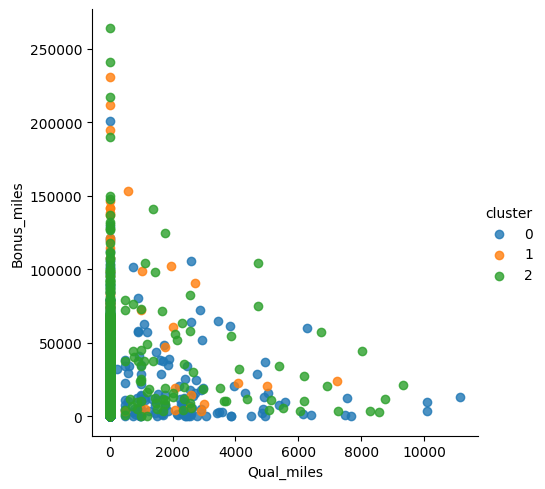

In [17]:
sns.lmplot(data=features,x='Qual_miles',y='Bonus_miles',hue='cluster',fit_reg=False)

In [18]:
cluster.cluster_centers_

array([[3.58044494e+04, 1.02863562e+02, 1.76978183e+00, 1.01530446e+00,
        1.00716379e+00, 1.16315591e+04, 9.85216542e+00, 3.05230869e+02,
        9.15662651e-01, 3.85022371e+03],
       [5.40537308e+05, 4.85494505e+02, 3.20879121e+00, 1.03296703e+00,
        1.03296703e+00, 5.21480879e+04, 2.03516484e+01, 1.72919780e+03,
        5.61538462e+00, 6.17261538e+03],
       [1.61514158e+05, 2.58351254e+02, 2.99761051e+00, 1.00955795e+00,
        1.02867384e+00, 3.35677969e+04, 1.70704898e+01, 8.90133811e+02,
        2.59259259e+00, 4.87977778e+03]])

In [19]:
silhouette_score(features,cluster.labels_)

np.float64(0.6254661811787052)

In [20]:
kmeans.inertia_

11832923806761.82

In [21]:
inertia=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(features)
  inertia.append(kmeans.inertia_)

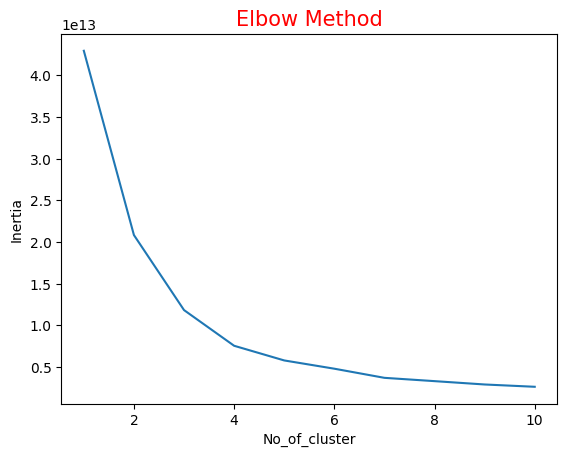

In [22]:
plt.plot(range(1,11),inertia)
plt.xlabel('No_of_cluster')
plt.ylabel('Inertia')
plt.title('Elbow Method',color='red',size=15);

In [23]:
kmeans=KMeans(n_clusters=2)

In [24]:
cluster=kmeans.fit(features)

In [25]:
cluster.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [26]:
silhouette_score(features,cluster.labels_)

np.float64(0.7543211169056316)

**Heirarchial Clustering**

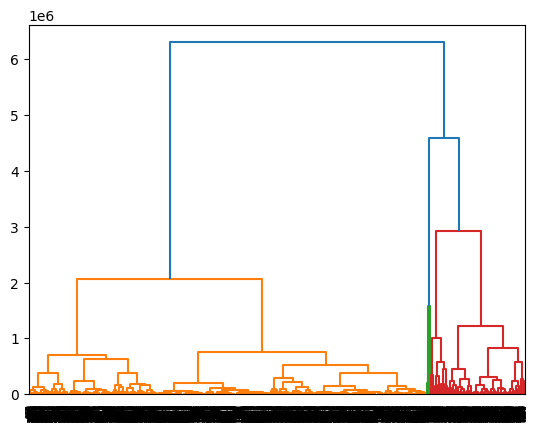

In [27]:
dendrogram=sch.dendrogram(sch.linkage(features,method='ward'))

In [28]:
agg=AgglomerativeClustering(n_clusters=2,linkage='ward')

In [29]:
clusters=agg.fit(features)

In [30]:
np.unique(clusters.labels_)

array([0, 1])

In [31]:
silhouette_score(features,clusters.labels_)

np.float64(0.650795312372285)

**DBSCAN**

In [32]:
std_sca=StandardScaler()

In [33]:
features=pd.DataFrame(std_sca.fit_transform(df),columns=df.columns)
features.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-1.735125,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-1.734263,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,-1.733402,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,-1.732540,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,-1.731679,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918


In [34]:
output=[]
eps= np.arange(0.1,0.7,0.1)
min_node= range(1,11)
for i in eps:
    for j in min_node:
        labels= DBSCAN(eps=i,min_samples=j).fit(features).labels_
        score=silhouette_score(features,labels)
        output.append([i,j,score])

In [35]:
a=pd.DataFrame(output,columns=['eps','min_node','silhoutte_score'])
score=a.iloc[:,2].max()

In [36]:
a[a.silhoutte_score==score]

,eps,min_node,silhoutte_score
0,0.1,1,0.028991


In [37]:
labels= DBSCAN(eps=0.2,min_samples=8).fit(features).labels_
np.unique(labels)

array([-1,  0,  1,  2,  3,  4,  5])

In [38]:
features.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

<Axes: xlabel='Qual_miles', ylabel='Bonus_miles'>

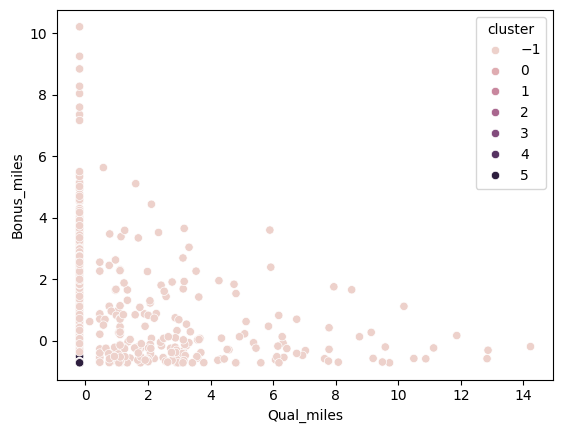

In [42]:
features['cluster'] = labels
sns.scatterplot(data=features, x='Qual_miles', y='Bonus_miles', hue='cluster')

In [45]:
!pip install plotly

In [48]:
import plotly.express as pe
pe.scatter(features,x='Qual_miles', y='Bonus_miles', color=labels)

In [49]:
pow(2,-(1/10))

0.9330329915368074